Importante: si os da errores, instalad la versión de TF 2.10.
Fuente: https://github.com/keras-team/keras-io/issues/1241

In [1]:
import tensorflow as tf
tf.__version__

'2.10.1'

In [2]:
!pip install tensorflow~=2.10.0

In [3]:
import tensorflow as tf
print(tf.__version__)

2.10.1


# El problema del desvanecimiento del gradiente

En este notebook vamos a comprobar por nosotros mismos en qué consiste el problema del *vanishing gradient* o desvanecimiento del gradiente.

Para ello, haremos uso de la función `make_circles` de `sklearn.datasets` para crear nuestro conjunto de datos:

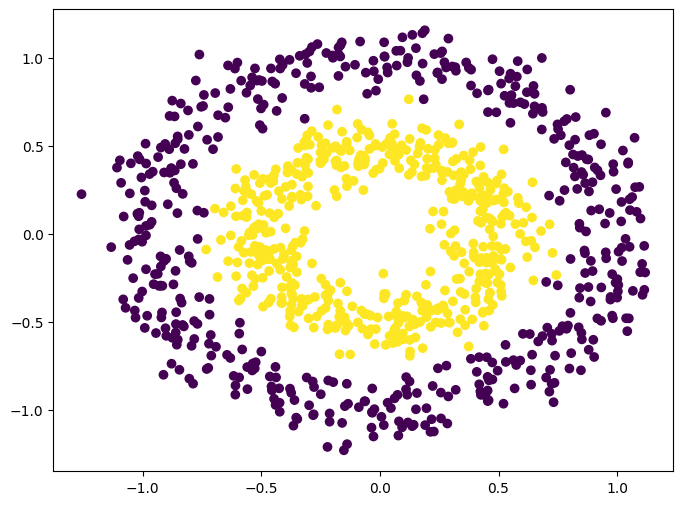

In [4]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Como podéis ver, se trata de un dataset sencillo. De hecho, una red neuronal con dos capas es capaz de solucionarlo.

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

tf.keras.utils.set_random_seed(42)

In [6]:
model = Sequential([
    Dense(5, "relu", input_shape=(2,)),
    Dense(1, "sigmoid")
])

In [7]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X, y, batch_size=32, epochs=100, verbose=0)

([<matplotlib.lines.Line2D at 0x7a0ad5016a40>], Text(0.5, 1.0, 'Loss (train)'))

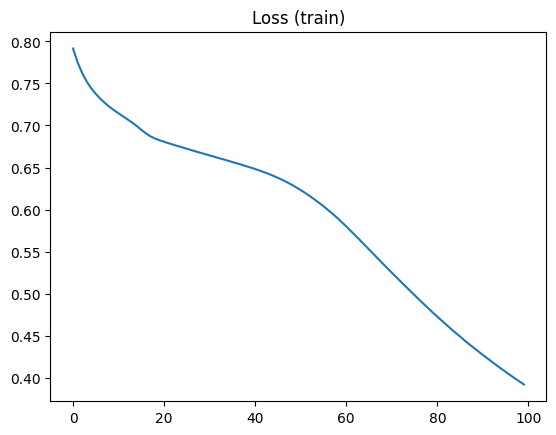

In [8]:
plt.plot(history.history['loss']), plt.title('Loss (train)')

Fijaos que la curva sigue siendo muy inclinada en la época 100. Esto indica que podríamos entrenarla durante más épocas y posiblemente conseguiríamos mejores resultados (dependería del comportamiento del modelo con los datos de validación, que hemos omitido en este ejemplo por simplicidad).

Vamos a calcular ahora las métricas:

In [9]:
print(model.evaluate(X,y))

32/32 [==============================] - 0s 3ms/step - loss: 0.3900 - acc: 0.9380
[0.39000430703163147, 0.9380000233650208]


In [10]:
from sklearn.metrics import classification_report
y_pred = (model.predict(X) > 0.5).astype(np.uint8)
print(classification_report(y, y_pred))

32/32 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       500
           1       0.98      0.89      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



Fijaos que hemos conseguido un 93% de accuracy con solo 2 capas.

Tened en cuenta que hemos utilizado la unidad lineal rectificada (ReLU) en la capa oculta de arriba.

Por defecto, la capa densa en Keras utilizará activación lineal (es decir, sin activación) que en la mayoría de los casos no es útil.

Normalmente usamos ReLU en las redes neuronales modernas.

Pero también podemos probar la forma de la vieja escuela como todo el mundo hace dos décadas:

In [11]:
model = Sequential([
    Dense(5, "sigmoid", input_shape=(2,)),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X,y))

y_pred = (model.predict(X) > 0.5).astype(np.uint8)
print(classification_report(y, y_pred))

32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - acc: 0.5000
[0.6929919719696045, 0.5]
32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


¡Fijaos como ha caído el accuracy! ¡Menudo desastre!

Vamos a probar a añadir más capas, a ver si mejora...

In [12]:
model = Sequential([
    Dense(5, "sigmoid", input_shape=(2,)),
    Dense(5, "sigmoid"),
    Dense(5, "sigmoid"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=32, epochs=100, verbose=0)
print(model.evaluate(X,y))

y_pred = (model.predict(X) > 0.5).astype(np.uint8)
print(classification_report(y, y_pred))

32/32 [==============================] - 0s 1ms/step - loss: 0.6929 - acc: 0.5000
[0.692868709564209, 0.5]
32/32 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nada, no hay forma. Si os fijáis, lo que está ocurriendo realmente es que el modelo siempre predice 1:

In [13]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

Curioso, ¿no os parece?

Todo el mundo dice que las redes neuronales profundas son capaces de resolver los problemas más complejos, y aquí estamos nosotros, sin embargo, que no podemos resolver un problema super sencillo haciendo nuestra red más profunda.

¿Por qué?

¡Vamos a averiguarlo!

### Visualización de los pesos de cada capa

¿No deberíamos tener una red neuronal más potente con más capas?

Sí, debería ser así. Pero resulta que al añadir más capas, desencadenamos el problema del desvanecimiento del gradiente.

Para ilustrar lo sucedido, veamos cómo se ven los pesos a medida que entrenamos nuestra red.

En Keras podemos conectar una función callback al proceso de entrenamiento.

Vamos a crear nuestro propio objeto callback para interceptar y registrar los pesos de cada capa de nuestro modelo perceptrón multicapa (MLP) al final de cada epoch.

In [14]:
from tensorflow.keras.callbacks import Callback

class WeightCapture(Callback):
    "Capture the weights of each layer of the model"
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.weights = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch) # remember the epoch axis
        weight = {}
        for layer in model.layers:
            if not layer.weights:
                continue
            name = layer.weights[0].name.split("/")[0]
            weight[name] = layer.weights[0].numpy()
        self.weights.append(weight)

Derivamos la clase Callback y definimos la función `on_epoch_end()`. Esta clase necesitará el modelo creado para inicializarse. Al final de cada época, leerá cada capa y guardará los pesos en un array numpy.

Para poder experimentar con diferentes configuraciones de nuestra red, vamos a crear una función de ayuda para configurar el modelo de red neuronal:

In [15]:
def make_mlp(activation, initializer, name):
    "Create a model with specified activation and initalizer"
    model = Sequential([
        Input(shape=(2,), name=name+"0"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"1"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"2"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"3"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"4"),
        Dense(1, activation="sigmoid", kernel_initializer=initializer, name=name+"5")
    ])
    return model

Creamos una red neuronal con 4 capas ocultas para poder ver cómo responde cada capa al entrenamiento.

Variaremos la función de activación de cada capa oculta así como la inicialización de los pesos.

Para poder distinguir las capas vamos a nombrar cada capa en lugar de dejar que Keras asigne un nombre.

La entrada a la red es una coordenada en el plano XY, por lo que la entrada es un vector de `shape` 2. La salida es una clasificación binaria. Por lo tanto usamos activación sigmoidea para hacer que la salida caiga en el rango de 0 a 1.

Recordad que tenemos que pasar el callback en la llamada fit() para que guarde los pesos de las capas al entrenar el modelo:

In [16]:
from tensorflow.keras.initializers import RandomNormal
initializer = RandomNormal(mean=0.0, stddev=1.0, seed=42)
batch_size = 32
n_epochs = 100

model = make_mlp("sigmoid", initializer, "sigmoid")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7022 - acc: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - acc: 0.4360
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - acc: 0.4460
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - acc: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - acc: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - acc: 0.5030
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - acc: 0.5470
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - acc: 0.5380
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - acc: 0.5290
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6896 - acc: 0.4980
Epoch 11/100
32/32 [==============================] - 0s 2m

In [17]:
print(model.evaluate(X,y))
y_pred = (model.predict(X) > 0.5).astype(np.uint8)
print(classification_report(y, y_pred))

32/32 [==============================] - 0s 1ms/step - loss: 0.6128 - acc: 0.6230
[0.6128419637680054, 0.6230000257492065]
32/32 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.71      0.42      0.53       500
           1       0.59      0.83      0.69       500

    accuracy                           0.62      1000
   macro avg       0.65      0.62      0.61      1000
weighted avg       0.65      0.62      0.61      1000



Vamos a definir una función que muestre los pesos de las capas y a visualizarlos:

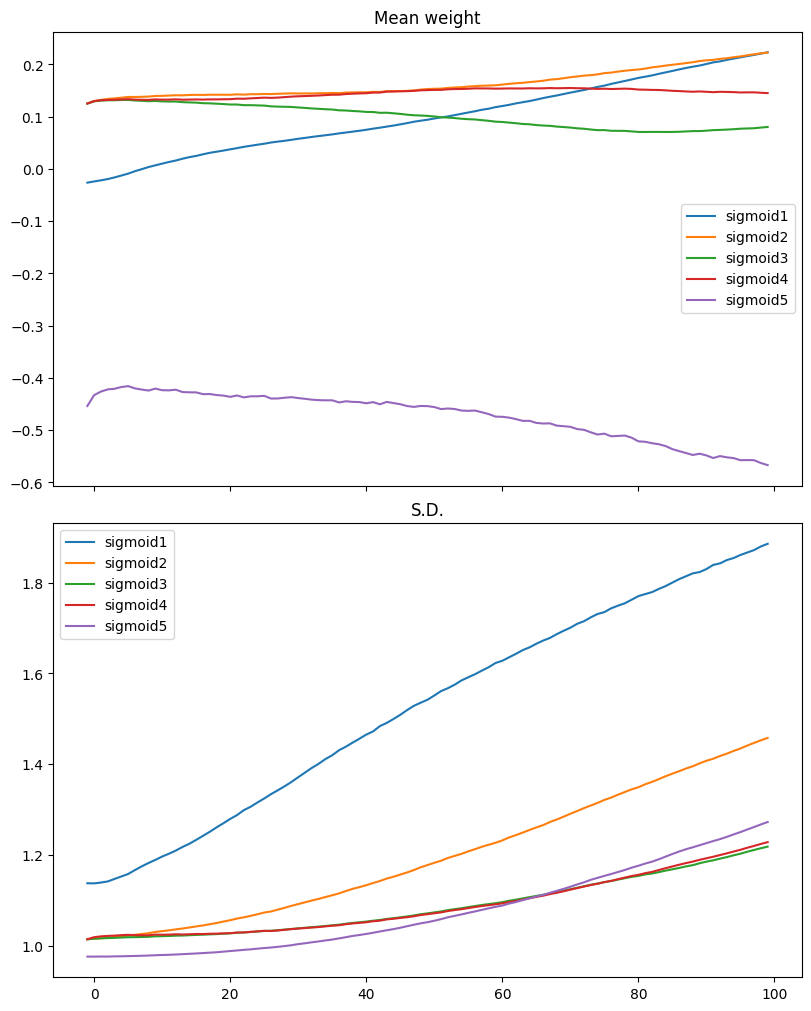

In [18]:
def plotweight(capture_cb):
    "Plot the weights' mean and s.d. across epochs"
    fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(8, 10))
    ax[0].set_title("Mean weight")
    for key in capture_cb.weights[0]:
        ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in capture_cb.weights[0]:
        ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
    ax[1].legend()
    plt.show()

plotweight(capture_cb)

Como podemos observar, las medias de los pesos en las distintas capas no son muy distintas, excepto en la última capa. Pero lo verdaderamente interesante es ver cómo la capa 1 es la que mayor variabilidad tiene (desviación estándar, "S.D."). Esto significa que es la que más está modificando sus pesos. Por otro lado, las últimas capas son las que menos.

Vamos a probar a cambiar la función de activación por una `tanh`:

32/32 [==============================] - 0s 4ms/step - loss: 0.0136 - acc: 0.9970
[0.013584589585661888, 0.996999979019165]
32/32 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



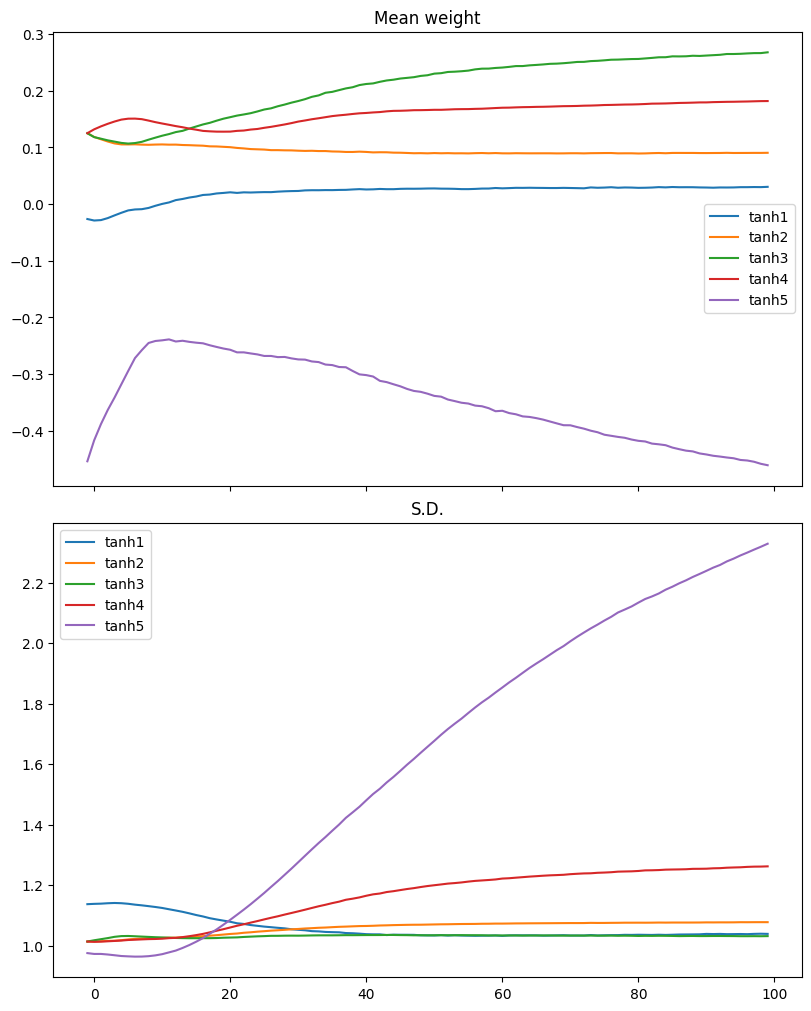

In [19]:
# tanh activation, large variance gaussian initialization
model = make_mlp("tanh", initializer, "tanh")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)

print(model.evaluate(X,y))
y_pred = (model.predict(X) > 0.5).astype(np.uint8)
print(classification_report(y, y_pred))

plotweight(capture_cb)

Tanto las pérdidas como la precisión mejoran. Si observamos el gráfico, no vemos un cambio brusco en la media y la desviación estándar de los pesos, sino que todas las capas convergen lentamente.

Veamos ahora con la función de activación de tipo ReLU:

32/32 [==============================] - 1s 5ms/step - loss: 0.0153 - acc: 0.9950
[0.015251820906996727, 0.9950000047683716]
32/32 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       500
           1       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



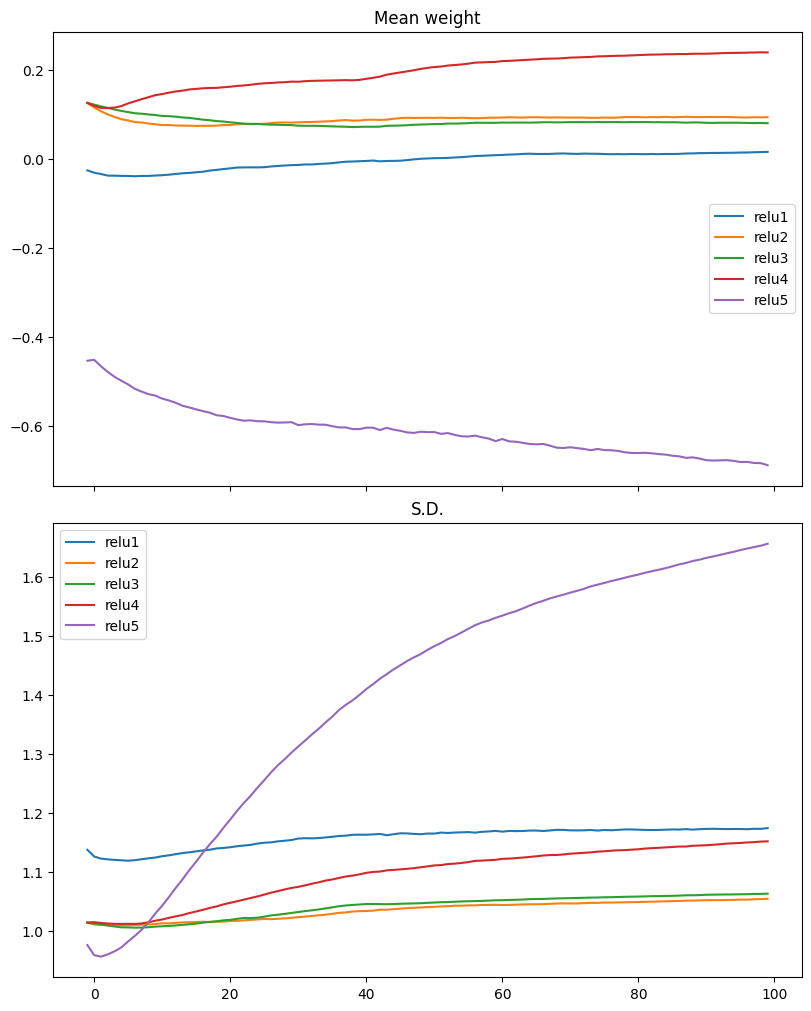

In [20]:
# relu activation, large variance gaussian initialization
model = make_mlp("relu", initializer, "relu")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(-1)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.fit(X, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)

print(model.evaluate(X,y))
y_pred = (model.predict(X) > 0.5).astype(np.uint8)
print(classification_report(y, y_pred))

plotweight(capture_cb)

Como podemos ver, los pesos evolucionan de forma diferente dependiendo de las funciones de activación.

Sin embargo, lo que realmente nos va a permitir ver el problema del desvanecimiento del gradiente, son éstos mismos, los gradientes.

# Visualizando los gradientes de cada capa

El artículo de Xavier Glorot y Yoshua Bengio, "Understanding the difficulty of training deep feedforward neural networks", sugería observar el gradiente de cada capa en cada iteración de entrenamiento,
así como la desviación estándar del mismo.

> Bradley (2009) found that back-propagated gradients were smaller as one moves from the output layer towards the input layer, just after initialization. He studied networks with linear activation at each layer, finding that the variance of the back-propagated gradients decreases as we go backwards in the network

<small>— “Understanding the difficulty of training deep feedforward neural networks” (2010)</small>

Para entender cómo se relaciona la función de activación con el gradiente percibido durante el entrenamiento, necesitamos ejecutar el bucle de entrenamiento manualmente.

A continuación veremos cómo podemos monitorizar el gradiente durante el entrenamiento:

In [21]:
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.BinaryCrossentropy()

def train_model(X, y, model, n_epochs=n_epochs, batch_size=batch_size):
    "Run training loop manually"
    train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    gradhistory = []
    losshistory = []
    def recordweight():
        data = {}
        for g,w in zip(grads, model.trainable_weights):
            if '/kernel:' not in w.name:
                continue # skip bias
            name = w.name.split("/")[0]
            data[name] = g.numpy()
        gradhistory.append(data)
        losshistory.append(loss_value.numpy())
    for epoch in range(n_epochs):
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)

            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            if step == 0:
                recordweight()
    # After all epochs, record again
    recordweight()
    return gradhistory, losshistory

La clave en la función anterior es el bucle for anidado. En él, lanzamos `tf.GradientTape()` y pasamos un *batch* de datos al modelo para obtener una predicción, que luego se evalúa utilizando la función de pérdida.

Después, podemos extraer el gradiente de la "GradientTape" comparando la pérdida con el peso entrenable del modelo.

A continuación, actualizamos los pesos utilizando el optimizador, que empleará los gradientes calculados para actualizar los pesos.

Pero... recordemos qué es exactamente esto de los gradientes.

Para un valor de pérdida $\mathcal{L}$ y una capa con pesos $\mathtt{W=[w_1, w_2, w_3, w_4, w_5]}$ (por ejemplo, la capa de salida), tenemos que el gradiente es matriz:

$\frac{\delta\mathcal{L}}{\delta W}=\left[\frac{\delta\mathcal{L}}{\delta w_1}, \frac{\delta\mathcal{L}}{\delta w_2}, \frac{\delta\mathcal{L}}{\delta w_3}, \frac{\delta\mathcal{L}}{\delta w_4}, \frac{\delta\mathcal{L}}{\delta w_5}\right]$

El problema con esto es que si alguno de estos valores se hace muy pequeño, como irá multiplicado por los de las capas anteriores debido a la regla de la cadena, al final las capas iniciales terminan sin apenas tener actualización:

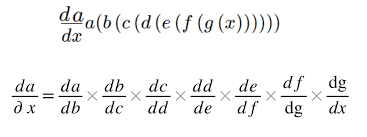

Vamos a definir una función que nos permita visualizar los gradientes:

In [22]:
from sklearn.metrics import accuracy_score

def plot_gradient(gradhistory, losshistory):
    "Plot gradient mean and sd across epochs"
    fig, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True, figsize=(8, 12))
    ax[0].set_title("Mean gradient")
    for key in gradhistory[0]:
        ax[0].plot(range(len(gradhistory)), [w[key].mean() for w in gradhistory], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in gradhistory[0]:
        ax[1].semilogy(range(len(gradhistory)), [w[key].std() for w in gradhistory], label=key)
    ax[1].legend()
    ax[2].set_title("Loss")
    ax[2].plot(range(len(losshistory)), losshistory)
    plt.show()

Antes de entrenar: Accuracy 0.5
Después de entrenar: Accuracy 0.631


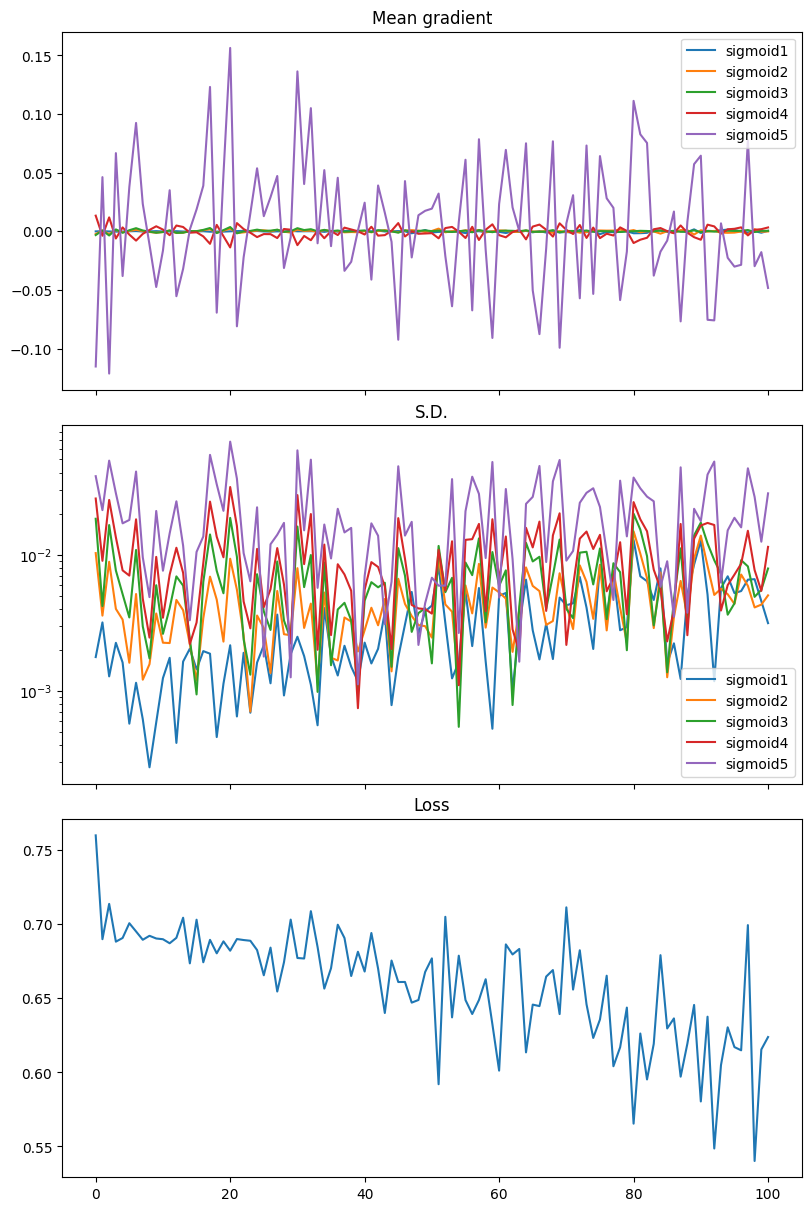

In [23]:
model = make_mlp("sigmoid", initializer, "sigmoid")
print("Antes de entrenar: Accuracy", accuracy_score(y, (model(X) > 0.5)))
gradhistory, losshistory = train_model(X, y, model)
print("Después de entrenar: Accuracy", accuracy_score(y, (model(X) > 0.5)))
plot_gradient(gradhistory, losshistory)

Mirando la gráfica, las pérdidas no disminuyen significativamente.

La media del gradiente (es decir, la media de todos los elementos de la matriz de gradiente) sólo tiene un valor apreciable en la última capa, mientras que en las demás capas es prácticamente cero.

La desviación estándar del gradiente está en el nivel de entre 0,01 y 0,001 aproximadamente.

Repitiendo esto con la activación tanh, vemos un resultado diferente, lo que explica por qué el rendimiento es mejor:

In [24]:
tf.keras.backend.clear_session()

Before training: Accuracy 0.495
After training: Accuracy 0.996


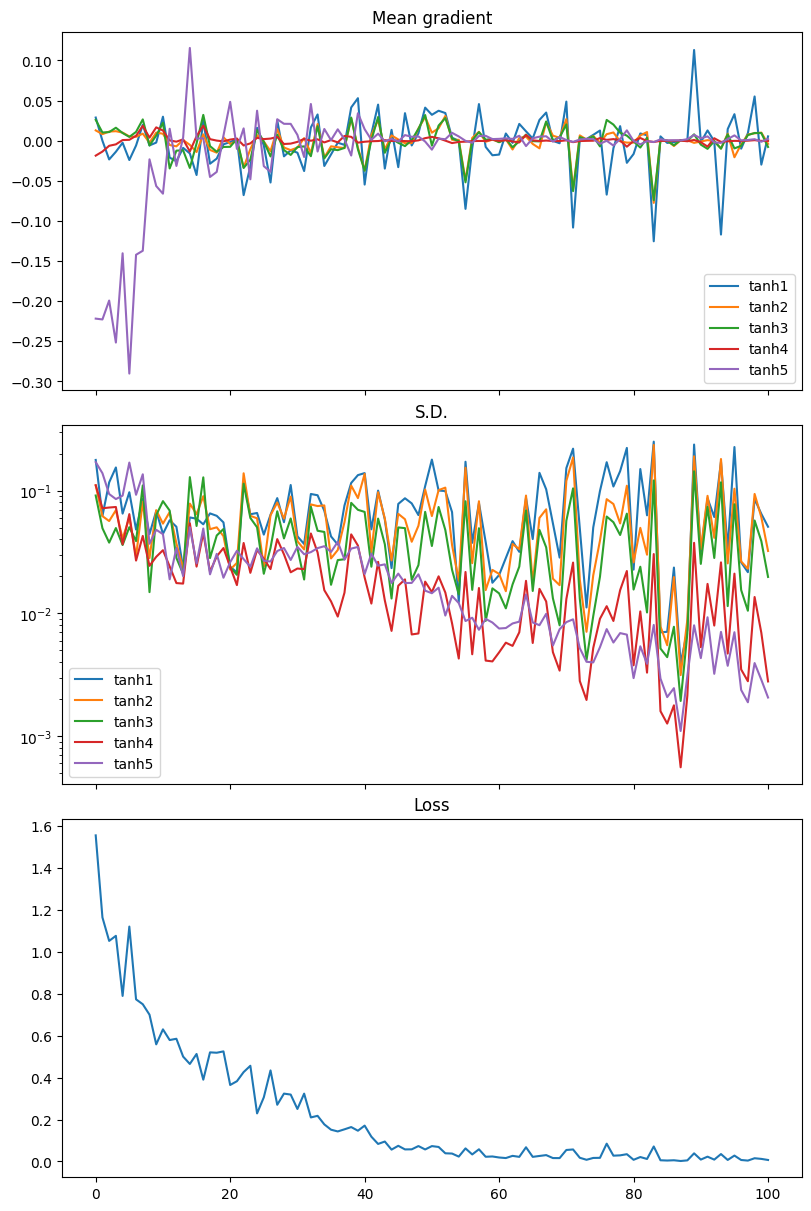

In [25]:
model = make_mlp("tanh", initializer, "tanh")
print("Before training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
gradhistory, losshistory = train_model(X, y, model)
print("After training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
plot_gradient(gradhistory, losshistory)

A partir del gráfico de la media de los gradientes, vemos que los gradientes de cada capa se mueven por igual. La desviación estándar del gradiente también es una orden de magnitud mayor que en el caso de la activación sigmoide, en torno a 0,1 y 0,01.

Por último, también podemos ver lo mismo en la activación por unidad lineal rectificada (ReLU). Y en este caso la pérdidas disminuyeron rápidamente, de ahí que la veamos como la activación más eficiente para utilizar en redes neuronales:

In [26]:
tf.keras.backend.clear_session()

Before training: Accuracy 0.502
After training: Accuracy 0.994


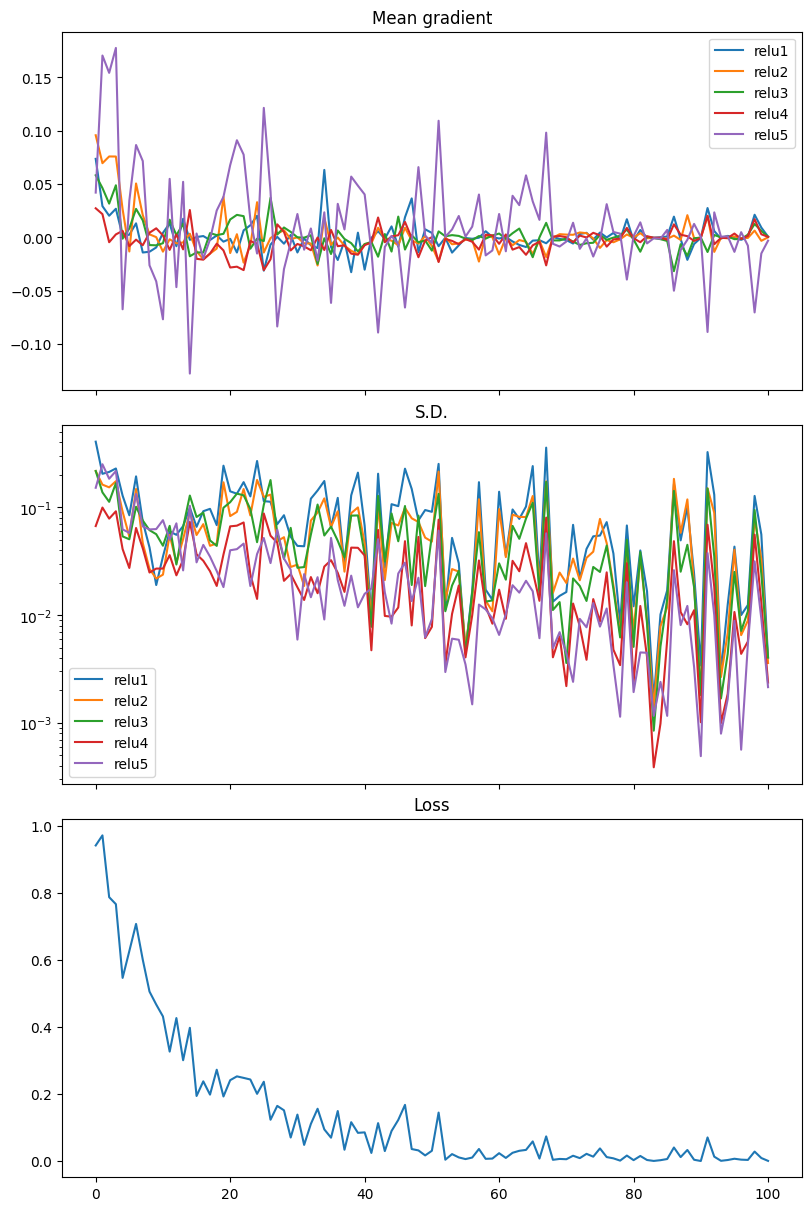

In [27]:
model = make_mlp("relu", initializer, "relu")
print("Before training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
gradhistory, losshistory = train_model(X, y, model)
print("After training: Accuracy", accuracy_score(y, (model(X) > 0.5)))
plot_gradient(gradhistory, losshistory)

**Fuente:** https://machinelearningmastery.com/visualizing-the-vanishing-gradient-problem/